In [87]:
from sodapy import Socrata
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [2]:
#access data from city of chicago API and convert request data to pandas dataframe

In [7]:
#get 2017 and 2018 crime data
client = Socrata("data.cityofchicago.org", "HfV6h8Xj9GdgDGkPS9JEkKvlp")
crimes_id = "6zsd-86xi"
response_crimes = client.get(crimes_id, where="year between 2017 and 2018", limit=800000)
crimes_2017_2018_df = pd.DataFrame.from_records(response_crimes)

In [68]:
#get community area name data
community_area_id = "igwz-8jzy"
response_cas = client.get(community_area_id)
community_areas_df = pd.DataFrame.from_records(response_cas)
community_areas_df['community_area'] = community_areas_df['area_num_1']
community_areas_to_merge = community_areas_df[['community_area', 'community']]

In [70]:
#merging in community area names
crime_with_cas = pd.merge(crimes_2017_2018_df, community_areas_to_merge, on="community_area")
#checking NAs in variables
crime_with_cas.isna().any()

arrest                  False
beat                    False
block                   False
case_number             False
community_area          False
date                    False
description             False
district                 True
domestic                False
fbi_code                False
id                      False
iucr                    False
latitude                 True
location                 True
location_description     True
longitude                True
primary_type            False
updated_on              False
ward                     True
x_coordinate             True
y_coordinate             True
year                    False
community               False
dtype: bool

In [71]:
#since there are no NAs in the primary type variable I can use size to determine the counts
crime_by_type = crime_with_cas.groupby('primary_type').size().reset_index(name="count")
crime_by_type['percent'] = crime_by_type['count']/crimes_2017_2018_df.shape[0]
crime_by_type.sort_values(by = 'percent', ascending=False)

,primary_type,count,percent
30,THEFT,129425,0.242206
2,BATTERY,98995,0.185259
6,CRIMINAL DAMAGE,56848,0.106385
1,ASSAULT,39678,0.074253
8,DECEPTIVE PRACTICE,37753,0.070651
23,OTHER OFFENSE,34356,0.064294
3,BURGLARY,24730,0.046280
17,NARCOTICS,24644,0.046119
27,ROBBERY,21560,0.040347
16,MOTOR VEHICLE THEFT,21393,0.040035


In [19]:
#what percentage of crimes result in an arrest?

In [73]:
grouped_arrest = crime_with_cas.groupby('arrest').size()/crime_with_cas.shape[0]
grouped_arrest

arrest
False    0.80361
True     0.19639
dtype: float64

In [37]:
#how seasonal are crimes? has the crime rate gone down over time?

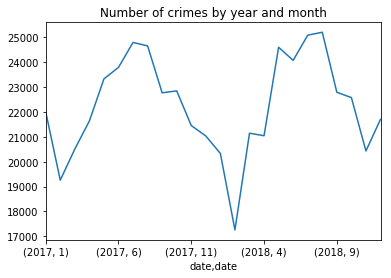

In [74]:
crime_by_month = crime_with_cas.groupby([pd.to_datetime(crime_with_cas['date']).dt.year, pd.to_datetime(crime_with_cas['date']).dt.month]).size()
crime_by_month.plot(kind="line", title= "Number of crimes by year and month")
#fix axis

In [75]:
#how do the number of crimes differ by community area?

In [78]:
crime_by_area = crime_with_cas.groupby('community').size().reset_index(name="count")
crime_by_area.sort_values(by='count', ascending=False)

,community,count
5,AUSTIN,30429
47,NEAR NORTH SIDE,25367
41,LOOP,21480
49,NEAR WEST SIDE,18448
52,NORTH LAWNDALE,18377
65,SOUTH SHORE,17325
32,HUMBOLDT PARK,16095
75,WEST TOWN,15625
4,AUBURN GRESHAM,14897
70,WEST ENGLEWOOD,14016


In [85]:
#arrest by area, also maybe do top crimes by area

In [112]:
#use geopandas and make maps

In [86]:
#adding in census data now

In [ ]:
#https://api.census.gov/data/2017/acs/acs5/subject?get=NAME,group(S0101)&for=us:1

In [ ]:
#number of households
#total all: B03002_001E
#total not hispanic: B03002_002E
#total white alone: B03002_003E
#total black alone: B03002_004E
#total asian alone: B03002_006E

#number of households who received food stamps or SNAP benefits
#total: B22003_001E
#yes: #B22003_002E
#no: #B22003_005E

#owner occupied or renter occupied households
#owner occupied: #B25003_002E
#renter occupied: #B25003_003E
#tenure total: #B25003_001E

In [131]:
response_acs = requests.get("https://api.census.gov/data/2017/acs/acs5?get=NAME,B03002_001E,B03002_012E,B03002_003E,B03002_004E,B22003_001E,B22003_002E,B25003_001E,B25003_003E&for=block%20group:*&in=state:17%20county:031&key=faa9380c4c99556827d85c391d21845b8c4629c5")

In [136]:
acs_df = pd.DataFrame.from_records(response_acs.json())
#rename column names
col_names = {'B03002_001': 'total_race', 'B03002_012E': 'hispanic', 'B03002_003E': 'white', 'B03002_004E': 'black', 'B22003_001E': 'total_food_stamps', 'B22003_002E': 'received_food_stamps', 'B25003_001E': 'tenure_total', 'B25003_003E': 'renter-occupeied', 'zip code tabulation area': 'zip code'}
acs_df

In [134]:
acs_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NAME,B03002_001E,B03002_012E,B03002_003E,B03002_004E,B22003_001E,B22003_002E,B25003_001E,B25003_003E,state,county,tract,block group
1,"Block Group 1, Census Tract 2519, Cook County,...",600,0,11,589,None,None,194,53,17,031,251900,1
2,"Block Group 2, Census Tract 2519, Cook County,...",1546,92,78,1376,None,None,402,275,17,031,251900,2
3,"Block Group 1, Census Tract 8211.01, Cook Coun...",1341,598,712,23,None,None,448,21,17,031,821101,1
4,"Block Group 3, Census Tract 8211.01, Cook Coun...",1356,456,778,48,None,None,357,111,17,031,821101,3
5,"Block Group 2, Census Tract 8211.01, Cook Coun...",616,17,599,0,None,None,269,0,17,031,821101,2
6,"Block Group 4, Census Tract 8211.01, Cook Coun...",1193,329,774,0,None,None,329,105,17,031,821101,4
7,"Block Group 1, Census Tract 8202.02, Cook Coun...",2054,1092,886,22,None,None,655,281,17,031,820202,1
8,"Block Group 3, Census Tract 8202.02, Cook Coun...",558,110,434,7,None,None,235,70,17,031,820202,3
9,"Block Group 2, Census Tract 8202.02, Cook Coun...",752,114,634,4,None,None,368,76,17,031,820202,2
